#Coral Area Measurements
##First Look
###Sergio Daniel Hernandez Charpak
###Jose Francisco Molano

<p>Notebook creado para el análisis de las imágenes de corales tomadas por Nancy Ruiz para el grupo BIOMMAR bajo la dirección de Susana Simancas en Uniandes en el marco del proyecto del curso Imágenes y Visión dictado por Marcela Hernández en el semestre 2016-10</p>

<p> Nuestra meta es usar esta librería http://scikit-image.org/docs/stable/api/api.html </p>

<p>Se pueden ver ejemplos en: http://scikit-image.org/docs/stable/auto_examples/index.html </p>

###Imports

In [1]:
%pylab inline
import pylab
import numpy as np
import matplotlib.pyplot as plt
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.measure import label
from skimage import measure
from skimage import morphology
from skimage.color import rgb2gray

###Functions

In [4]:
def get_folder_name(folder_path):
    folder_name_array = (folder_path.strip('/')).split('/')
    return folder_name_array[len(folder_name_array)-1]

In [5]:
def umbralizar_otsu(imagen):
    thresh = threshold_otsu(imagen)
    binary = imagen < thresh
    return binary, thresh

In [6]:
def guardar_imagen(image, path):
    fig = plt.figure(figsize = (10,10))
    plt.gray()
    plt.imshow(image)
    plt.savefig(path)
    plt.xlabel("y(pixels)")
    plt.ylabel("x(pixels)")
    plt.show()
    plt.close(fig)

###Global definitions

In [3]:
inputfolder = '../../Fotos_prueba/'
outputfolder = './Outputs/'
images_extention = '.JPG'

In [7]:
input_folder_name = get_folder_name(inputfolder)
output_folder_name = get_folder_name(outputfolder)

In [8]:
print (input_folder_name, output_folder_name)

('Fotos_prueba', 'Outputs')


This is a test on one of the images. We will make use of the glob library to analyze all the images

In [9]:
fileset = glob.glob(inputfolder+'*'+images_extention)

In [10]:
n_files = len(fileset)
print("Number of "+images_extention+" Images in Folder: ", n_files)

('Number of .JPG Images in Folder: ', 25)


In [11]:
output_final_name = outputfolder+input_folder_name+'_areas.dat'
file_final_out = open(output_final_name, 'w')
file_final_out.write("%s %d \n"%("N_Images",n_files))
file_final_out.write("%s %s \n"%("Image","Coral Area (cm2)"))

###Proceso para cada Imagen

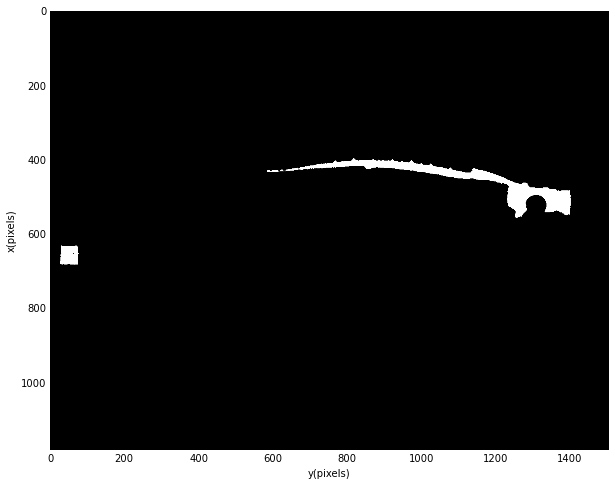

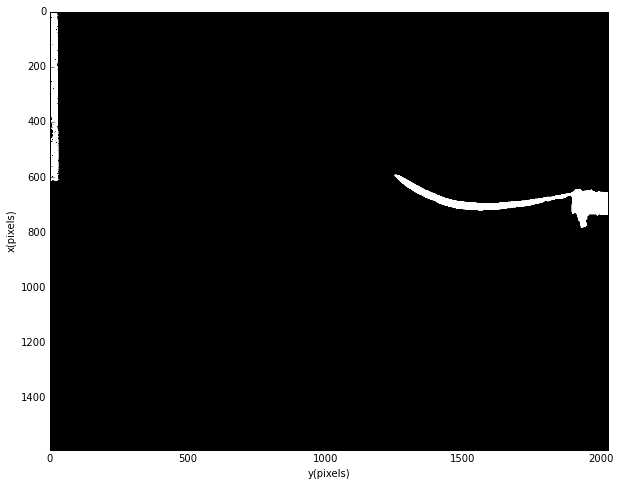

/usr/local/lib/python2.7/dist-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


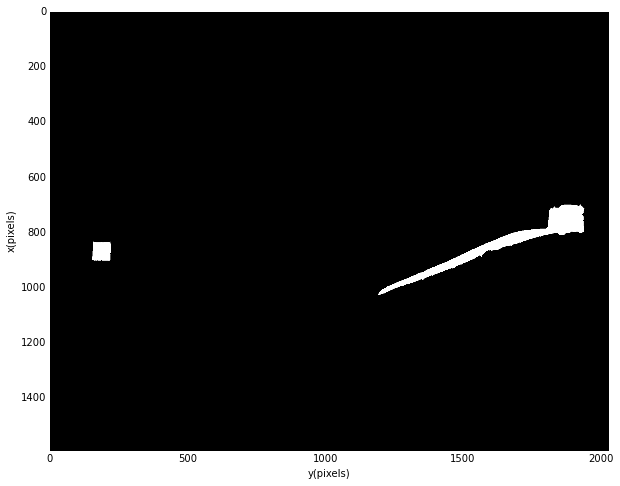

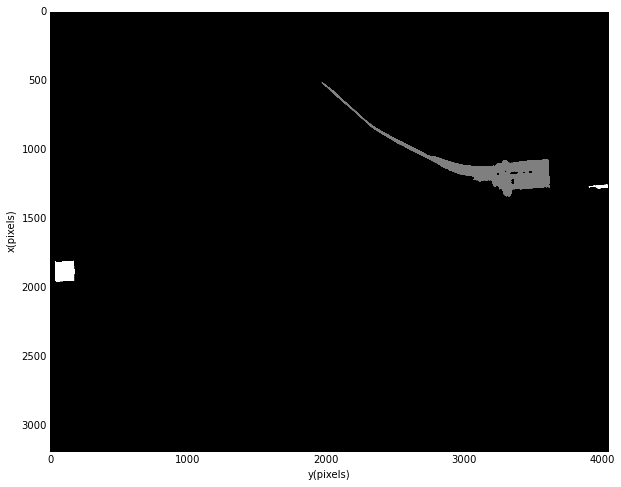

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:84: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:127: RuntimeWarning: divide by zero encountered in long_scalars


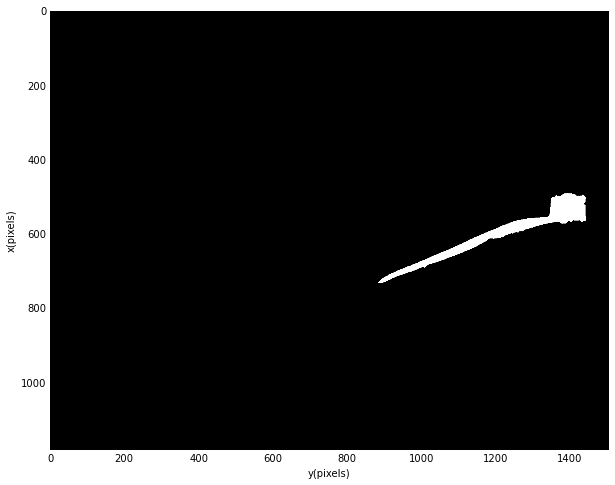

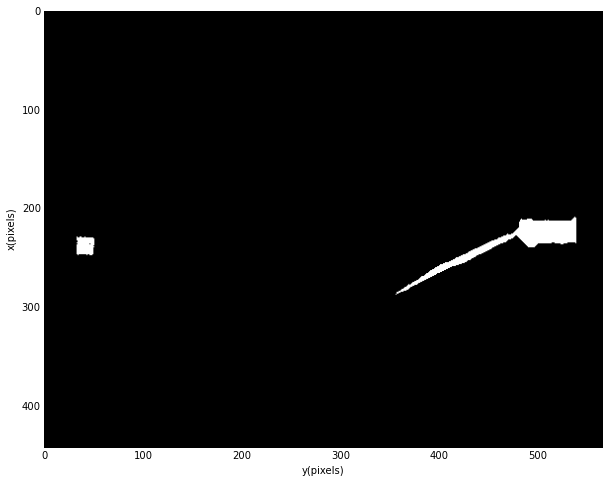

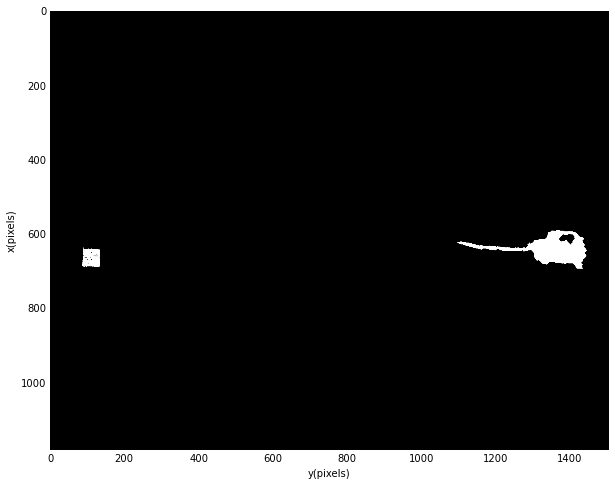

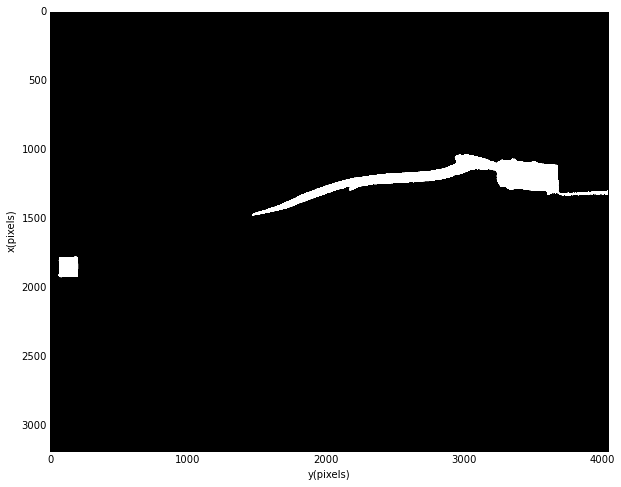

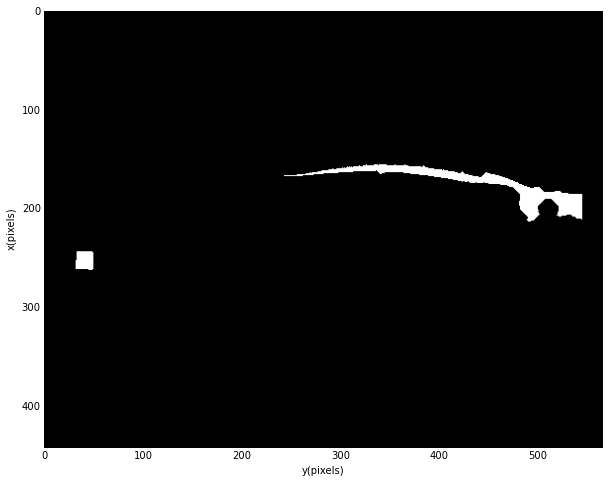

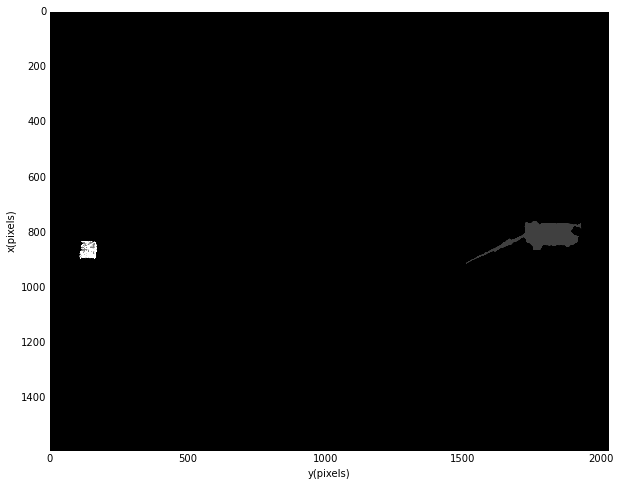

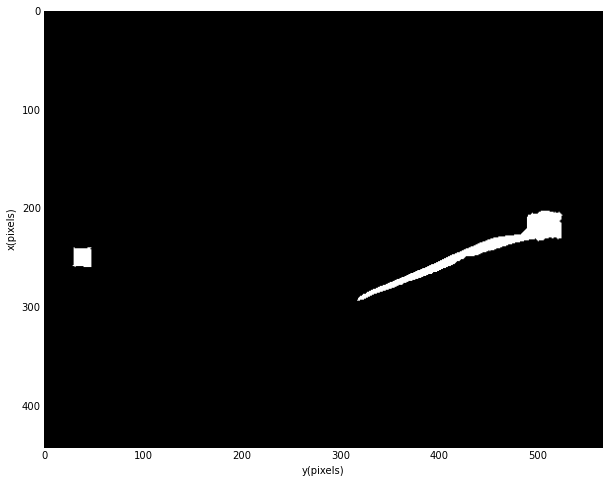

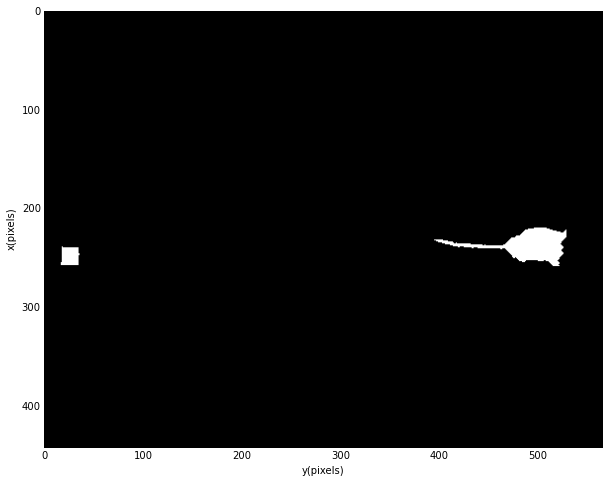

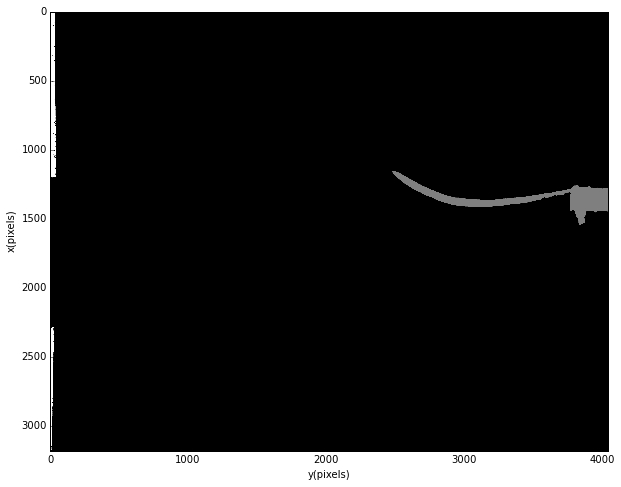

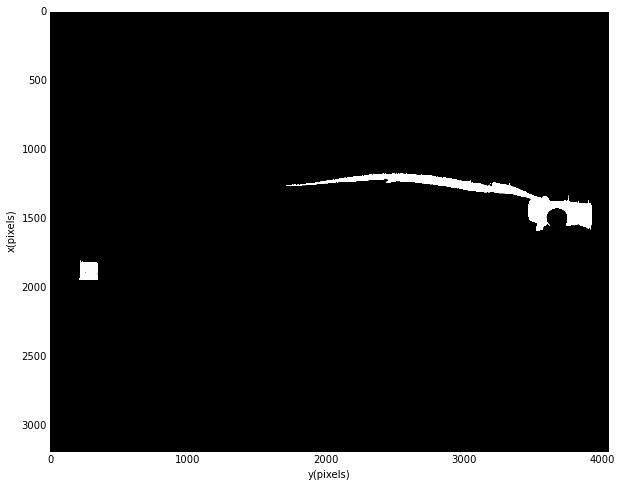

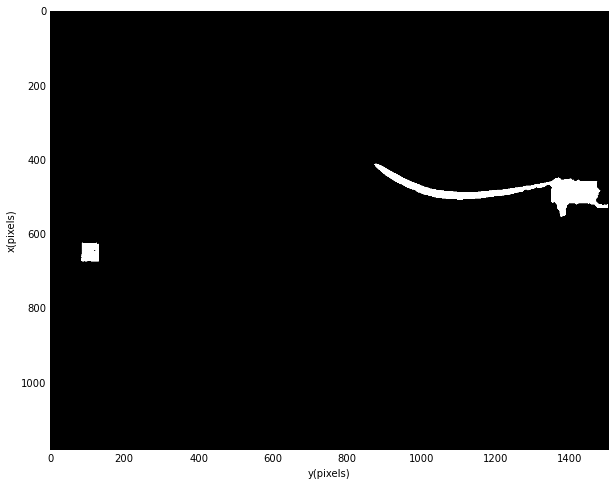

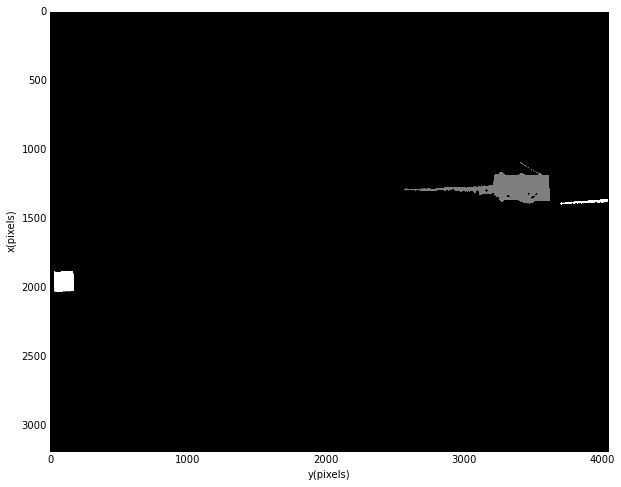

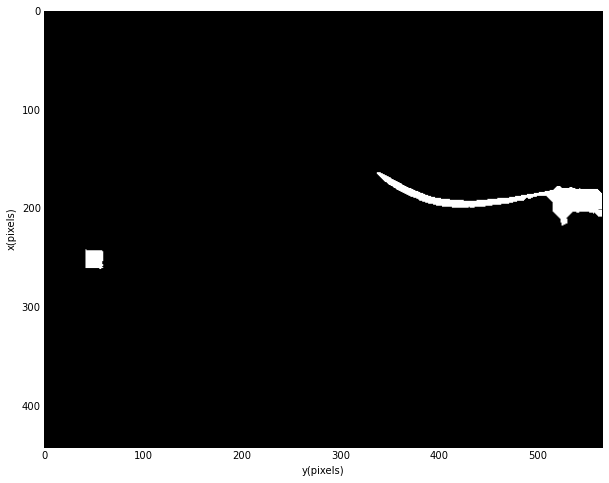

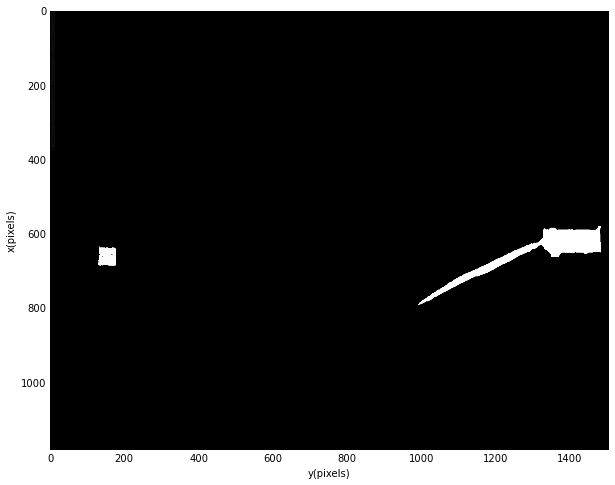

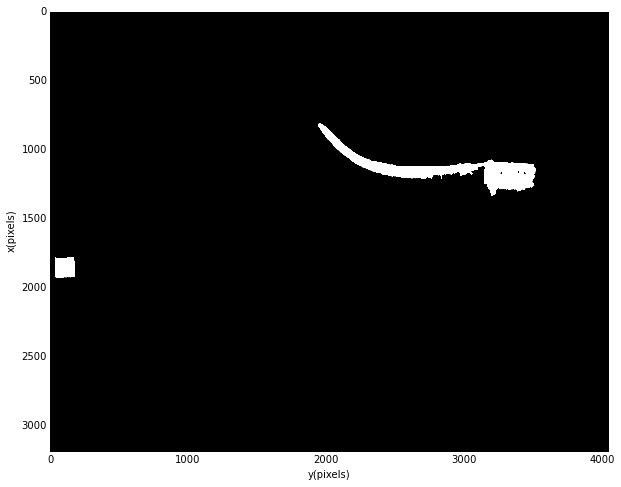

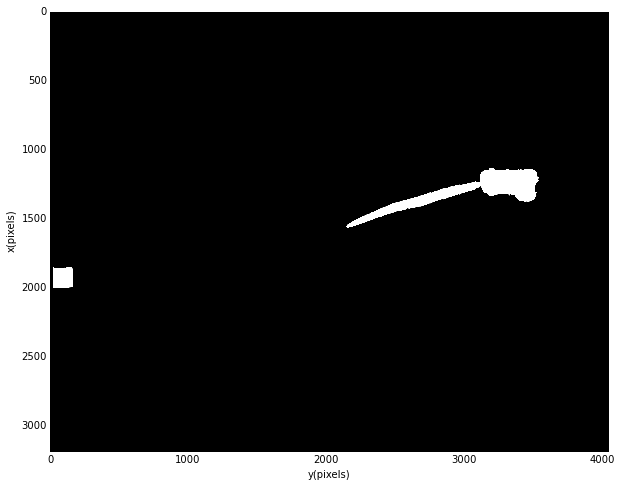

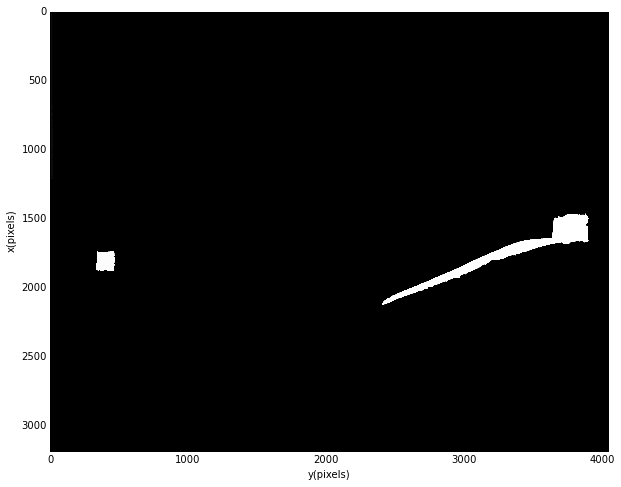

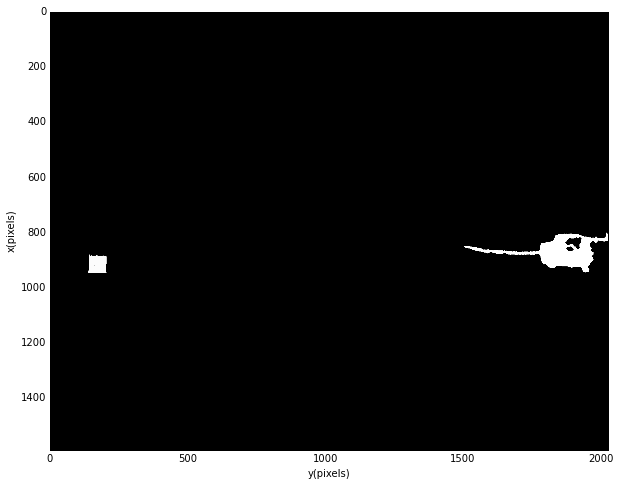

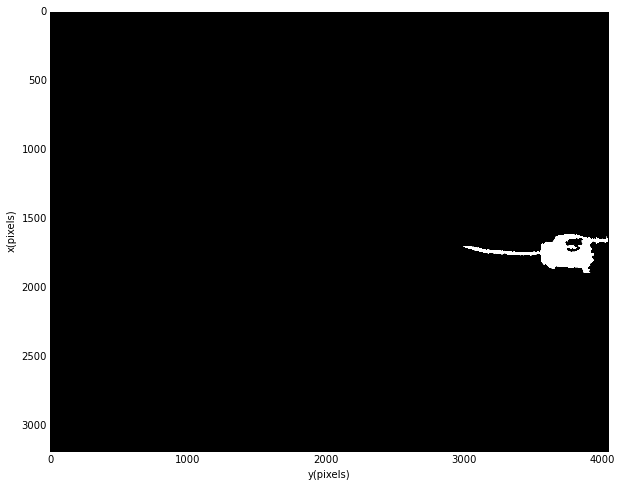

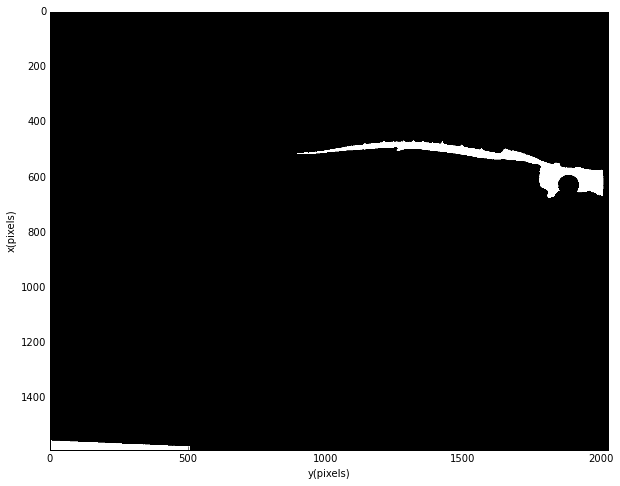

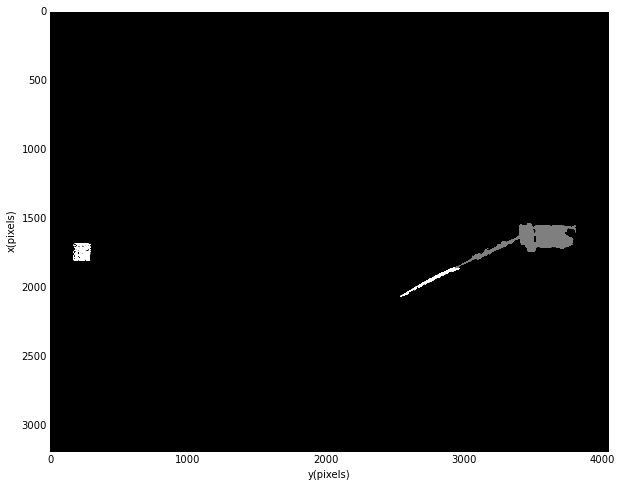

In [12]:
for input_image in fileset:
    image_name = get_folder_name(input_image).strip(images_extention)
    steps_filename = outputfolder + 'steps_'+image_name+'.dat'
    file_steps_out = open(steps_filename, 'w')
    image = pylab.imread(input_image)
    file_steps_out.write("%s %s \n"%("img_path", input_image))
    img = rgb2gray(image)
    #Dimension
    n_x, n_y = img.shape
    file_steps_out.write("%s %d %d \n"%("dim_x_y",n_x, n_y))
    #--------------------
    #The cut of the image
    #--------------------
    #The parameters are specify here
    #It can be modified if wanted HERE
    cut_prop = 0.04
    cut_y_0 = 0.5
    cut_y_final = 4.0
    file_steps_out.write("%s %f \n"%("cut_proportion",cut_prop))
    file_steps_out.write("%s %d %d \n"%("cut_y_0_final",cut_y_0, cut_y_final))
    n_colums_x = int(n_x*cut_prop)
    n_colums_y = int(n_y*cut_prop)
    #Arrays of the column index to be deleted
    array_index_columns_x_0 = np.arange(n_colums_x)
    array_index_columns_y_0 = np.arange(n_colums_y + cut_y_0*n_colums_y)
    array_index_columns_x_final = np.linspace(n_x-n_colums_x,n_x-1, n_colums_x)
    array_index_columns_y_final = np.linspace(n_y-cut_y_final*n_colums_y,n_y-1, cut_y_final*n_colums_y)
    #Deleting the columns
    img_delete_x = np.delete(img,array_index_columns_x_final,0 )
    img_delete_x = np.delete(img_delete_x,array_index_columns_x_0,0 )
    img_delete_y = np.delete(img_delete_x,array_index_columns_y_final,1 )
    img_delete_y = np.delete(img_delete_y,array_index_columns_y_0,1 )
    img = img_delete_y
    #New Dimensions
    n_x_new, n_y_new = img.shape
    file_steps_out.write("%s %d %d \n"%("dim_new_x_y",n_x_new, n_y_new))
    #--------------------
    # Umbralization of the image with otsu
    #--------------------
    #Proportion of the y dimension image. Square/Coral
    cut_y_img_umbr = 0.25 #Va a umbralizar el 0.25 de la imagen independientemente que el 0.75
    file_steps_out.write("%s %f \n"%("cut_otsu_thresholding",cut_y_img_umbr))
    n_y_cut = int(n_y_new*cut_y_img_umbr)
    img_square = np.zeros((n_x_new, n_y_new))
    img_coral = np.zeros((n_x_new, n_y_new))
    for i in range (n_x_new):
        for j in range(n_y_new):
            if(j<n_y_cut):
                img_square[i,j] = img[i,j]
            else:
                img_coral[i,j] = img[i,j]
    img_square_binary, thresh_square = umbralizar_otsu(img_square)
    img_coral_binary, thresh_coral = umbralizar_otsu(img_coral)
    img_thresholded = np.zeros((n_x_new, n_y_new))
    for i in range (n_x_new):
        for j in range(n_y_new):
            if(j<n_y_cut):
                img_thresholded[i,j] = img_square_binary[i,j]
            else:
                img_thresholded[i,j] = img_coral_binary[i,j]
    file_steps_out.write("%s %f %f \n"%("Otsu_thresh_square_coral", thresh_square, thresh_coral))
    #--------------------
    # Square area
    #--------------------
    threshold_up = int(n_y_new*cut_y_img_umbr)
    file_steps_out.write("%s %d \n"%("square_cut", threshold_up))
    img_thresholded_up = np.zeros((n_x_new,n_y_new))
    for i in range (n_x_new):
        for j in range(threshold_up):
            img_thresholded_up[i,j] = img_thresholded[i,j]
    # Labeling the regions
    # Num is the number of regions detected
    etiquetas_square, num = label(img_thresholded_up, connectivity=2, return_num=True)
    # histogram
    hist, bins_edges = np.histogram(etiquetas_square.ravel())
    # Removing the smaller objects
    etiquetas_square = morphology.remove_small_objects(etiquetas_square,np.sort(hist)[len(hist)-2] - 10)
    # histogram
    hist, bins_edges = np.histogram(etiquetas_square.ravel())
    # The square is the largest region after the background
    area_square = np.sort(hist)[len(hist)-2]
    file_steps_out.write("%s %f \n"%("area_square_pixels", area_square))
    # Scaling
    etiquetas_square =(255/np.max(etiquetas_square))*etiquetas_square
    image_scale = (255/np.max(img_thresholded))*img_thresholded
    # We remove the square so we only have the coral and its near objects
    image_scale= image_scale - etiquetas_square
    #--------------------
    # Coral area
    #--------------------
    # Labeling the regions
    # Num is the number of regions detected
    etiquetas, num = label(image_scale, connectivity=2, return_num=True)
    # Scaling
    etiquetas_scale = (255/np.max(etiquetas))*etiquetas
    # histogram
    hist, bins = np.histogram(etiquetas.ravel())
    # We sort the histogram. The coral is the largest object after the background
    # We want to remove all objects smaller
    hist_sorted = np.sort(hist)
    # We remove all objects smaller than the threshold.
    threshold_rm_objects = int (hist_sorted[len(hist_sorted)-2] - (hist_sorted[len(hist_sorted)-2])/5.0)
    # We remove the objects
    c = morphology.remove_small_objects(etiquetas,threshold_rm_objects)
    # Now we delated and erode to fill the holes in the coral
    # THIS can be Modified
    n_dilation_erosion = 6
    file_steps_out.write("%s %d \n"%("number_dilated_erode", n_dilation_erosion))
    d = c
    for i in range (n_dilation_erosion):
        d = morphology.dilation(d)
    for i in range (n_dilation_erosion):
        d = morphology.erosion(d)
    # Histogram
    hist, bins = np.histogram(d.ravel())
    # We remove again smaller objects just in case
    threshold_rm_objects =  (np.sort(hist)[len(hist)-2]) - int((np.sort(hist)[len(hist)-2])/50.0)
    d = morphology.remove_small_objects(d,threshold_rm_objects)
    # Labelling the regions
    etiquetas_coral, num = label(d, connectivity=2, return_num=True)
    # Histogram again
    hist, bins = np.histogram(etiquetas_coral.ravel())
    # The coral area in pixels is the 
    area_coral_pixels = np.sort(hist)[len(hist)-2]
    file_steps_out.write("%s %f \n"%("area_coral_pixels", area_coral_pixels))
    # We passe it to cm2 with the square area
    area_coral_cm_2 = area_coral_pixels/area_square
    file_steps_out.write("%s %f \n"%("area_coral_cm2", area_coral_cm_2))
    # We close the file and save it 
    file_steps_out.close()
    # We scale to prepare the final image
    etiquetas_coral = (255/np.max(etiquetas_coral))*etiquetas_coral
    # Form the final image
    final_image = etiquetas_square + etiquetas_coral
    # We save it
    final_image_path = outputfolder+image_name+"_final.png"
    guardar_imagen(final_image, final_image_path)
    file_final_out.write("%s \t %f \n"%(image_name, area_coral_cm_2))

In [13]:
file_final_out.close()